<a href="https://colab.research.google.com/github/hamza3laa/Clustering-/blob/main/Applying_different_clustering_Technics_to_iris_dateset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
from sklearn import datasets
iris=datasets.load_iris()
df = pd.DataFrame(iris['data'],columns=[['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)']])
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
X = iris['data']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


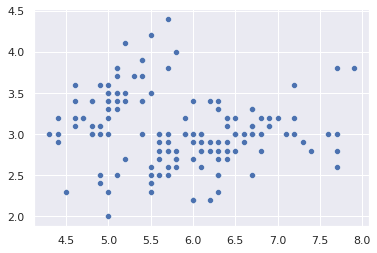

In [6]:
sns.scatterplot(X[:,0]  , X[: ,1])

#KMeans 

In [7]:
from sklearn.cluster import KMeans,MeanShift ,DBSCAN
model_km = KMeans(n_clusters=5)
kmclusters = model_km.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


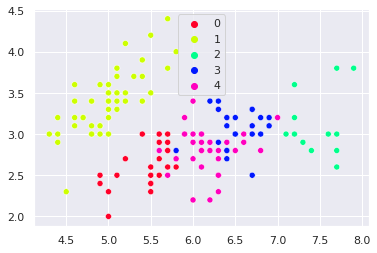

In [8]:
sns.scatterplot(X[: , 0], X[: , 1], hue= model_km.labels_ , palette='gist_rainbow');

##Detrmining  number of clusters using **The Elbow Method** method (Within-Cluster-Sum of Squared Errors )


In [10]:
WSS=[]
for i in range(2,11):
  model = KMeans(n_clusters=i)
  model.fit_predict(X)
  WSS.append(model.inertia_)
  

In [11]:
WSS

[152.3479517603579,
 78.851441426146,
 57.255523809523815,
 46.446182051282065,
 39.03998724608726,
 34.53097186147187,
 30.1865551948052,
 28.274541182501718,
 25.929713031343184]

Text(0, 0.5, 'Wssc')

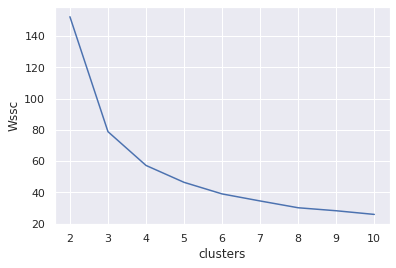

In [13]:
plt.plot(range(2,11) ,WSS) 
plt.xlabel('clusters')
plt.ylabel('Wssc')

 ### We could choose k to be either 3 or 4 or 5. In such an ambiguous case, we may use the Silhouette Method.


In [18]:
#let's try 3 clusters 
from sklearn.cluster import KMeans
model_km = KMeans(n_clusters=2)
kmclusters = model_km.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


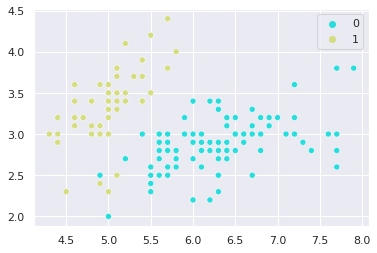

In [19]:
sns.scatterplot(X[: , 0], X[: , 1], hue= model_km.labels_ , palette='rainbow');

## As withn sum square distance takin into considartion the intra(diatnce inside certain cluster) cluster disance  only , It  might be better to use silhouette coffoiant which taking into considartion both inter and intra distance

#Detrmining  number of clusters using silhouette coffoiant

In [15]:
from sklearn.metrics import silhouette_score
silhoute_avg=[]
for i in range(2,11):
  model = KMeans(n_clusters=i)
  kmc= model.fit_predict(X)
  score = silhouette_score(X,model.labels_)
  silhoute_avg.append(score)



Text(0, 0.5, 'Silhought score')

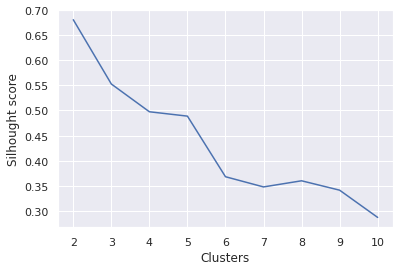

In [17]:
plt.plot(range(2,11) ,silhoute_avg) 
plt.xlabel('Clusters')
plt.ylabel('Silhought score')

### Highst score (peake of the grapgh) will detrmine the cluster so optimum numbre of clusters will be 2

#MeanShift

In [ ]:
model_sh = MeanShift()
model_sh.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


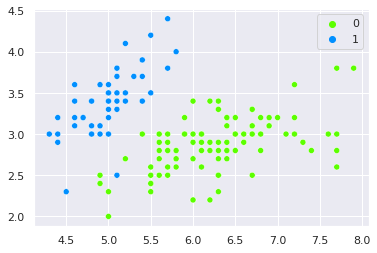

In [ ]:
sns.scatterplot(X[: , 0], X[: , 1], hue= model_sh.labels_ , palette='gist_rainbow');

# DBSCAN

In [ ]:
model_db = DBSCAN()
model_db.fit_predict(X)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


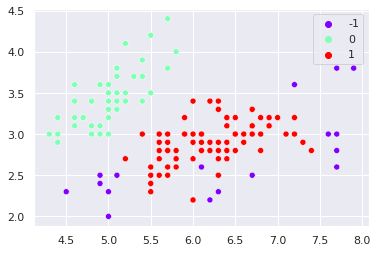

In [ ]:
sns.scatterplot(X[: , 0], X[: , 1], hue= model_db.labels_, palette='rainbow');

#Derrming Epsloin using noise 

In [ ]:
noise=[]
for i in np.linspace(.02,1.5, 10):
  model = DBSCAN(eps=i , min_samples=5)
  model.fit_predict(X)
  noise_precent = 100*sum(model.labels_==-1)/len(model.labels_)
  noise.append(noise_precent)

In [ ]:
noise

[100.0,
 88.66666666666667,
 38.666666666666664,
 10.666666666666666,
 2.0,
 0.6666666666666666,
 0.0,
 0.0,
 0.0,
 0.0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'eps')

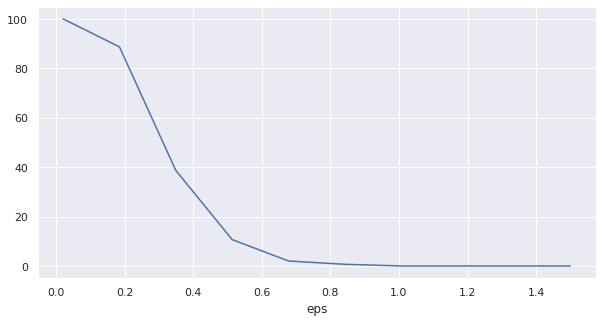

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(np.linspace(.02,1.5, 10) ,noise )
plt.xlabel('epslions')

In [24]:
#using new value of epsloin
samples = df.shape[1]+1
model_db = DBSCAN(eps=.60 , min_samples=samples)
model_db.fit_predict(X)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


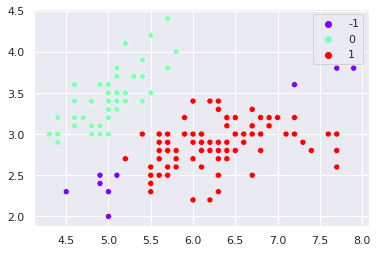

In [25]:
sns.scatterplot(X[: , 0], X[: , 1], hue= model_db.labels_, palette='rainbow');


# Detrmine epslon using K disatnce grapgh

In [ ]:
from sklearn.neighbors import NearestNeighbors
nei = NearestNeighbors(n_neighbors=2)
neighbors = nei.fit(X)

In [ ]:
neighbors.n_neighbors

2

In [ ]:
distances , metrcis = neighbors.kneighbors(X)


In [ ]:
#ploting k disatnce grapgh 
distances = np.sort(distances , axis=0)
distances

In [ ]:
distances = distances[:,1]


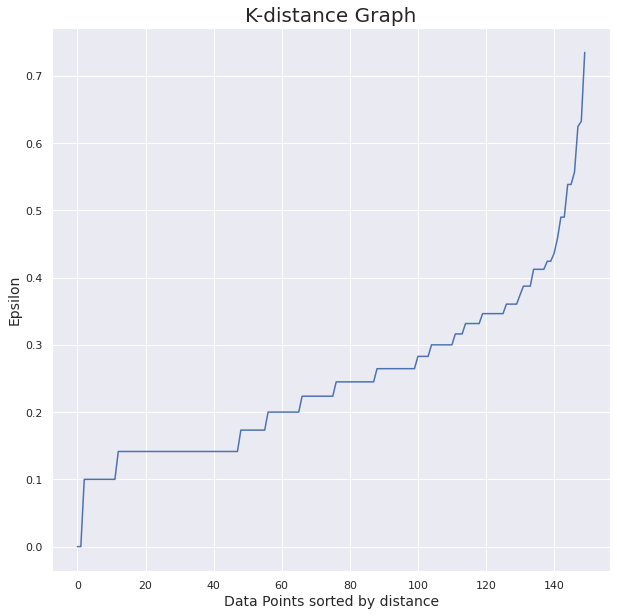

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
#using new value of epsloin
samples = df.shape[1]+1
model_db = DBSCAN(eps=.60 , min_samples=samples)
model_db.fit_predict(X)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


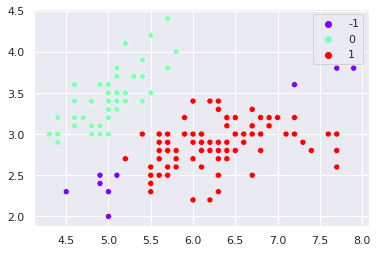

In [ ]:
sns.scatterplot(X[: , 0], X[: , 1], hue= model_db.labels_, palette='rainbow');


# Hierarchical Clustering

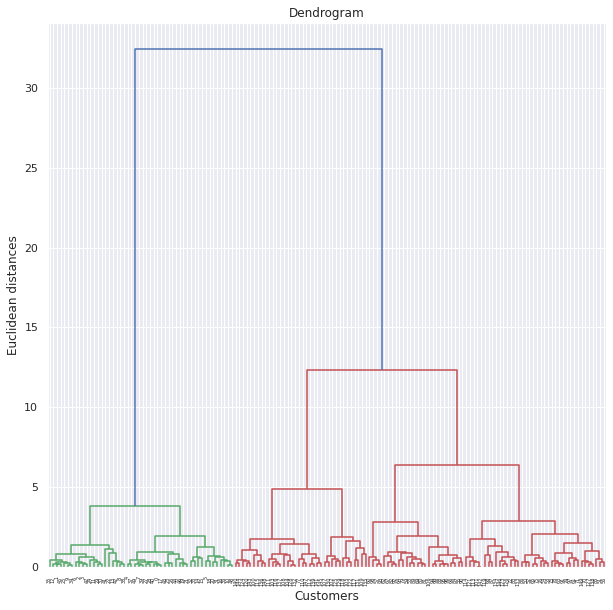

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 2,linkage ='average')
hc.fit_predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


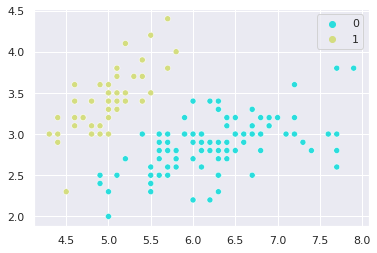

In [31]:
sns.scatterplot(X[: , 0], X[: , 1], hue= hc.labels_, palette='rainbow');


# Gaussian Mixture Models